# Project: Investigate a Dataset - Movie_Dataset_Analysis
This is a simple analysis of a movie dataset with visualizations project. 

I tried to investigate and establish relationships between variables using tables, charts, etc.

Thank you for taking your time to review.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

### Dataset Description 

This dataset details information of movies from 1960 to 2015. 

It includes, movie titles, budgets, directors, revenues, genres, and many more.


### Questions for Analysis
1. Can there be a relationship between movie budget and revenue?
2. Can there be a relationship between movie budget and vote average?
3. Can we find the top 10 movies?
4. Can we find the years with the most movies produced?
5. Can we find directors with the most movie releases?


In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

In [2]:
# import and assign csv file to dataframe (df)

df=pd.read_csv('tmdb-movies.csv')

# show last rows of the df
df.tail()

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

In [3]:
# Find the total number of rows and columns of the dataframe;

df.shape

(10866, 21)

There are 10866 rows and 21 columns

In [4]:
# find extensive details including datatypes of each column of the dataframe;

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Find a statistical overview of the dataframe

df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [6]:
# Average budget for a movie production;

df['budget'].mean()

14625701.09414688

The average budget for the production of movie is estimated at 14,717,951.1430

In [7]:
df['revenue'].mean()

39823319.79339223

The average revenue from a movie production is estimated at 40,084,133.9393

In [8]:
# Compute the total number of duplicates (if any)

sum(df.duplicated())

1

Only 1 row was duplicated

In [9]:
# Find the range of years of the dataframe;

df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

This data ranges between 1960 and 2014

In [10]:
# Identify the number of unique values in the dataset;

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [11]:
# This is to find the total number of missing values in the dataframe;

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some columns had missing data


### Data Cleaning
> Now we can try and reorganize the data. This process involves removing missing data, unwanted columns etc.

In [12]:
# View the first view rows
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [13]:
# Identify columns that are not relevant to current project

drop_columns=['cast', 'homepage', 'tagline', 'overview', 'production_companies', 'keywords', 'budget_adj', 'revenue_adj']

In [14]:
# Drop columns that are not relevant to 
#     current project using the drop function

df.drop(drop_columns, axis=1, inplace=True)

In [15]:
# Confirm new shape of dataframe

df.shape

(10866, 13)

8 columns dropped

In [16]:
# Confirm new dataframe

df.head(10)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title                        director  runtime  \
0                Jurassic World                 Colin Trevorrow      124   
1            Mad Max: Fury Road                   George Miller      120   
2                     Insurgent                Robert Schwentke      119   
3  Star Wars: The Force Awakens                     J.J. Abrams      136   
4                     Furious 7                       James Wan      137   
5                  The Revenant  Alejandro GonzÃ¡lez IÃ±Ã¡rritu      156   
6            Terminator Genisys                     Alan Taylor      125   
7                   The Martian                    Ridley Scott      141   
8                       Minions        Kyle Balda|Pierre Coffin       91   
9                    Inside Out                     Pete Docter       94   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2         Adventure|Science Fiction|Thriller      3/18/15        2480   
3   Action|Adventure|Science Fiction|Fantasy     12/15/15        5292   
4                      Action|Crime|Thriller       4/1/15        2947   
5           Western|Drama|Adventure|Thriller     12/25/15        3929   
6  Science Fiction|Action|Thriller|Adventure      6/23/15        2598   
7            Drama|Adventure|Science Fiction      9/30/15        4572   
8          Family|Animation|Adventure|Comedy      6/17/15        2893   
9                    Comedy|Animation|Family       6/9/15        3935   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015  
5           7.2          2015  
6           5.8          2015  
7           7.6          2015  
8           6.5          2015  
9           8.0          2015

In [17]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [18]:
# Confirm new shape

df.shape

(10865, 13)

In [19]:
# find total missing values in new dataframe 

df.isnull().sum() 

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [20]:
# drop the missing values

df.dropna(axis=0, inplace=True)

In [21]:
#confirm new shape

df.shape 

(10795, 13)

<a id='eda'></a>
## Exploratory Data Analysis

> We explore the use of charts and visualizations on the cleaned data and their relations with each other. 

### Research Question 1: 

### Which years had the most movie release?

In [22]:
# Finding the years with the most movie productions;

top_years=df['release_year'].value_counts()[:10]

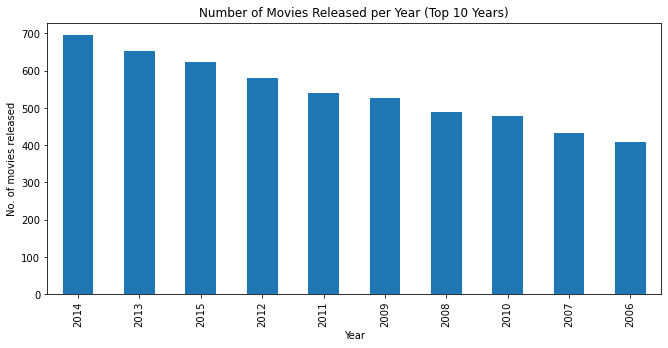

In [23]:
# Bar chart representing the top 10 years with the most produced;

top_years.plot(x='release_year', kind='bar', figsize=(11,5));
plt.xlabel('Year')
plt.ylabel('No. of movies released')
plt.title('Number of Movies Released per Year (Top 10 Years)')

# Plot graph
plt.show();

* 2014 had the most movies releases.

### Research Question 2: 
### What movies had the highest budget?

In [24]:
# Finding the movies with the highest budget;
# Sliced the dataframe by grouping and finding the sum value

highest_budget=df.groupby('original_title')['budget'].sum()

In [25]:
# Sort and find the top 10 movie budgets;

highest_budget=highest_budget.sort_values(ascending=False)[:10]
highest_budget.head()

original_title
The Warrior's Way                              425000000
Pirates of the Caribbean: On Stranger Tides    380000000
Pirates of the Caribbean: At World's End       300000000
Godzilla                                       290000000
Avengers: Age of Ultron                        280000000
Name: budget, dtype: int64

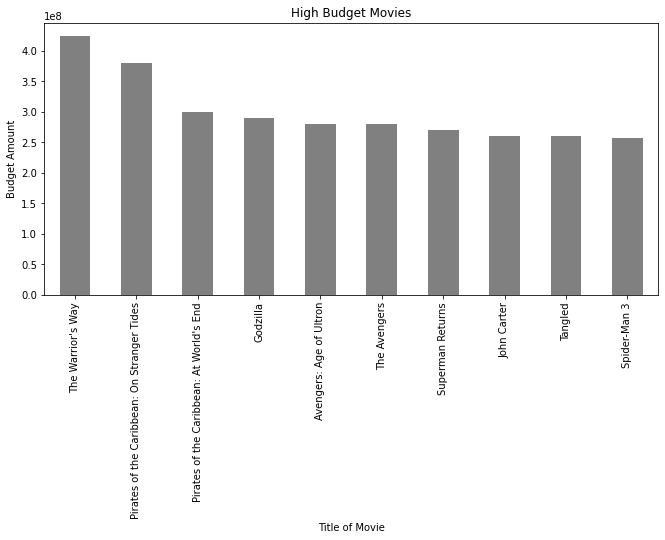

In [39]:
# Bar chart representing the top 10 movie budgets;  

highest_budget.plot(x='original_title', kind='bar', figsize=(11,5), color='grey');
plt.xlabel('Title of Movie')
plt.ylabel('Budget Amount')
plt.title('High Budget Movies')
plt.show();

* From the chart, The Warrior's Way had the highest budget.

### Research Question 3
### Can we establish the top 10 highly rated movies?

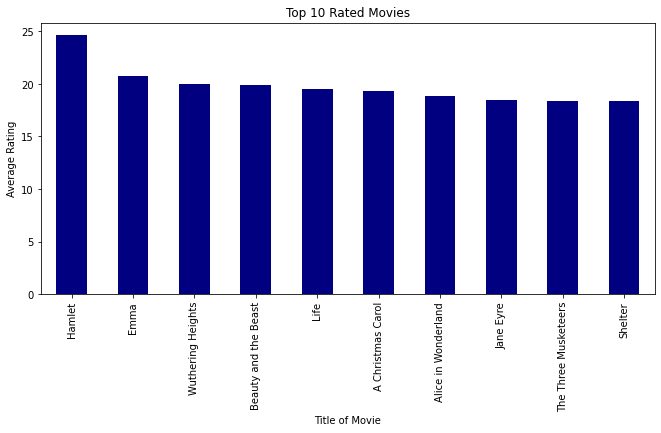

In [27]:
# Slice data by grouping titles and average votes. Plot the top 10 rated movies

top_rated=df.groupby('original_title')['vote_average'].sum()
top10_rated=top_rated.sort_values(ascending=False)[:10]
top10_rated.plot(x='vote_average', kind='bar', figsize=(11,5), color='navy');
plt.xlabel('Title of Movie')
plt.ylabel('Average Rating')
plt.title('Top 10 Rated Movies')
plt.show();

* Hamlet had the highest ratings (vote_average)

In [28]:
# Let's create a function that helps us to avoid repetitive codes;
# Basically, we call this function anytime we want to use a scatterplot.

def scatter(df, xw, yw,):
    x=df[xw]
    y=df[yw]
#   plt.title(title)
#   plt.xlabel(var1)
#   plt.ylabel(var2)
#    plt.show()
    plt.scatter(x,y)


### Research Question 3: 

### Is there are relationship between a movie budget and its revenue?

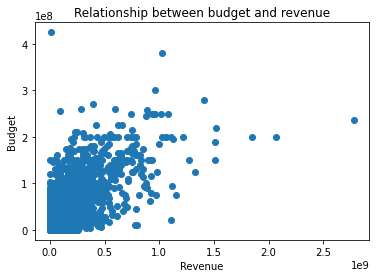

In [29]:
# Relation between movie budget and movie revenue;

scatter(df,'revenue','budget',)
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Relationship between budget and revenue')
plt.show();

* Scatter plot showing the relationship between movie budget and movie revenue. 
* We can deduce that a higher movie budget generates higher revenue.

### Research Question 4: 

#### Is there a correlation between revenue and popularity?

<Figure size 1008x720 with 0 Axes>

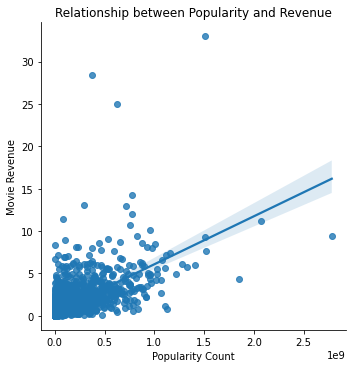

In [36]:
# finding a relationship between revenue and popularity by applying seaborn function

plt.figure(figsize=(14,10));
sns.lmplot(x='revenue', y='popularity', data = df);
plt.xlabel('Popularity Count')
plt.ylabel('Movie Revenue')
plt.title('Relationship between Popularity and Revenue')
plt.show();

* The popularity of a movie affects it's revenue.

### Question:
#### Is there a correlation between movie ratings (vote_average) and revenue?

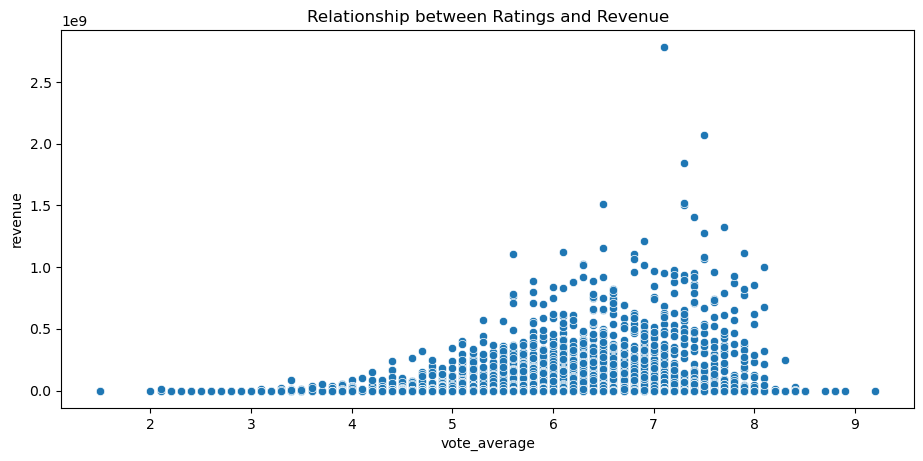

In [31]:
# Using scatter plot to find relationship between ratings and revenue

plt.figure(figsize=(11,5), dpi=100)
sns.scatterplot(x=df['vote_average'], y=df['revenue']);
plt.title('Relationship between Ratings and Revenue')
plt.show();

* This chart details the impact of movie rating (vote_average) on the revenue of a movie. Lower rated movies have lower revenue as compared to mid to high rated movies.

### Question
#### Can we find the top 20 directors with the most releases?

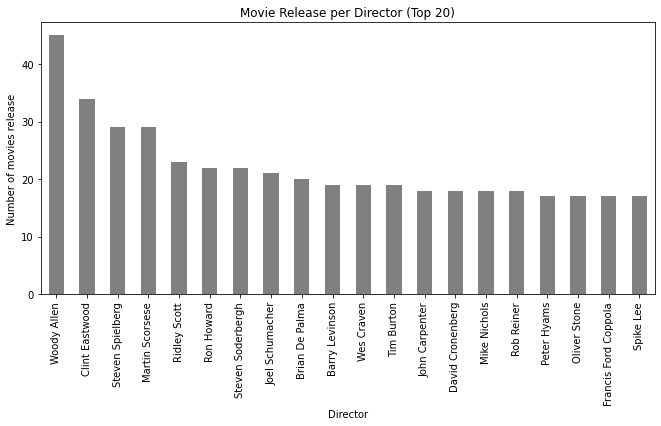

In [32]:
Top_directors=df.loc[:,'director'].value_counts()[:20]
Top_directors.plot(x='director', y='title', kind='bar', figsize=(11,5), color='grey');
plt.title('Movie Release per Director (Top 20)')
plt.xlabel('Director')
plt.ylabel('Number of movies release')
plt.show()

* A bar graph detailing the total number of movie releases (top 20) per Director

### Question:

### Which directors have the most movie releases?

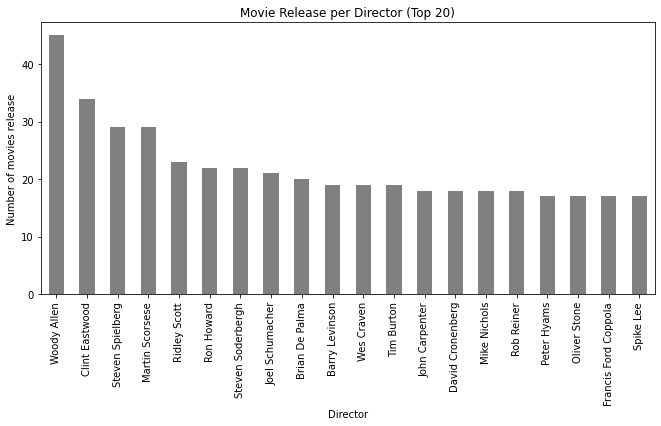

In [33]:
# Slice our data and plot directors and the number of movies

Top_directors=df.loc[:,'director'].value_counts()[:20]
Top_directors.plot(x='director', y='title', kind='bar', figsize=(11,5), color='grey');

# Graph labels
plt.title('Movie Release per Director (Top 20)')
plt.xlabel('Director')
plt.ylabel('Number of movies release')

# plot on a graph
plt.show()

* Director Woody Allen has the highest number of movies released.

### Question:

### Is there a correlation between movie budgets and revenues from movies released over the years?

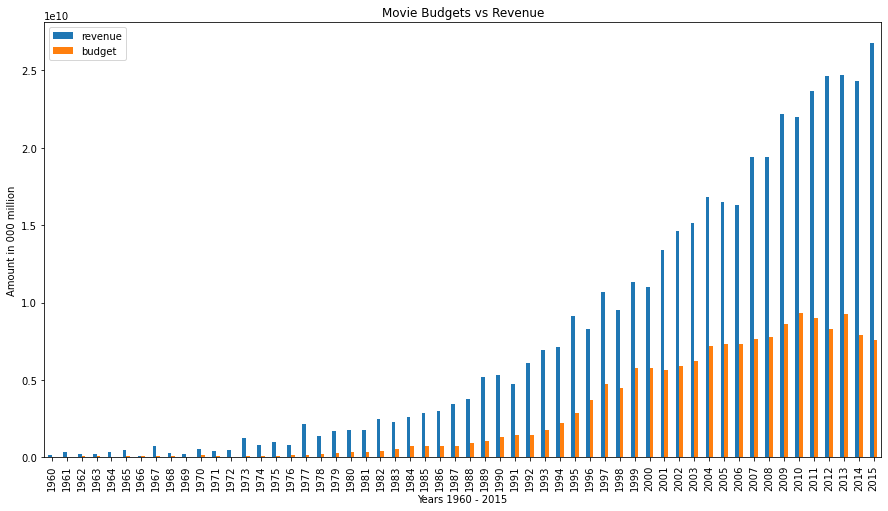

In [34]:
# Finding correlation between movie budgets and revenue;

df_line=pd.DataFrame(df, columns=['revenue','budget', 'release_year'])

new=df_line.groupby('release_year')[['revenue', 'budget']].sum()
new.head()
new.plot(kind='bar', figsize=(15,8));

plt.xlabel('Years 1960 - 2015')
plt.ylabel('Amount in 000 million')
plt.title('Movie Budgets vs Revenue');
plt.show();

* A bar chart comparing movies budgets and revenue from 1960 to 2015. There has been increases in movie budgets and a corresponding increase in revenue.

### Bonus chart of the industry (total movies per year)

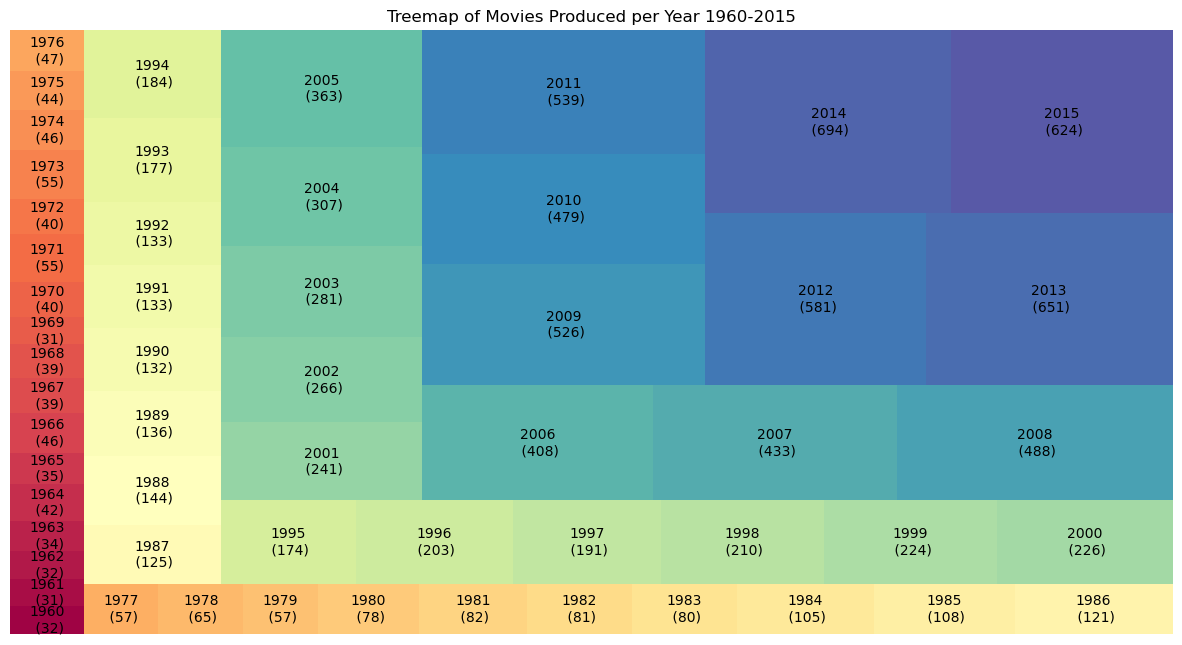

In [35]:
# Using a treemap to show the sizes years and total movie releases from 1960 to 2015

dfnew = df.groupby('release_year').size().reset_index(name='counts')
labels = dfnew.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dfnew['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.99)

# Decorate
plt.title('Treemap of Movies Produced per Year 1960-2015')
plt.axis('off')
plt.show()

* Treemap showing the relative sizes of total movies released each year since 1960. 2014 has the largest block.

<a id='conclusions'></a>
## Conclusions

* Most movies were released in 2011, 2012, 2015, 2013 and 2014. 2014 had the most movies releases.

* We can establish that movie titled 'The Warrior's Way' had the highest budget.

* Hamlet is the highest rated movie (vote_average).

* There is positive corelation between movie ratings and revenue.

* Director Woody Allen has the highest number of movies releases.

* There is a positive correlation between popularity and revenue of movies. Here, movies that are popular rake in higher revenues compared to less popular ones.

* Vote averages tend to be higher when the movie budget isn't that high.

* There is a positive relationship between movie budget and revenue. The higher the budget, the higher the revenue generated.

* We can deduce that the movie industry is a profitable; increasing budgets and great returns since the 1960s.

### Limitations

* There are more than 10 to 15% of data having null values or missing data. This analysis doesn't represent the population as the data used is imbalanced. 

#### Resources
* https://elitedatascience.com/python-seaborn-tutorial
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
* https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532469042115000